In [586]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline





In [587]:
#import getpass
#import os

#password = getpass.getpass()
#command0 = "sudo -S rm -rf logs*"
#command1 = "sudo -S python3 ./runner.py -t topo.yaml -x experiment_rr.yaml" 
#command2 = "sudo -S python3 ./runner.py -t topo.yaml -x experiment_rtt.yaml" 
#os.system('echo %s | %s' % (password, command1))
#os.system('echo %s | %s' % (password, command2))




In [588]:
download_rr = pd.concat([ pd.read_csv("./logs_rr/download{}.csv".format(i),) for i in range(0,5) ])
download_rtt = pd.concat([ pd.read_csv("./logs_rtt/download{}.csv".format(i)) for i in range(0,5) ])

In [589]:
download_rr["mbps"] = download_rr["recv_bytes"] * 8 / (1024)/ download_rr["elapsed"]
download_rtt["mbps"] = download_rtt["recv_bytes"] * 8 / (1024)/ download_rtt["elapsed"]


Text(0.5, 1.0, 'Download speed (Mbps)')

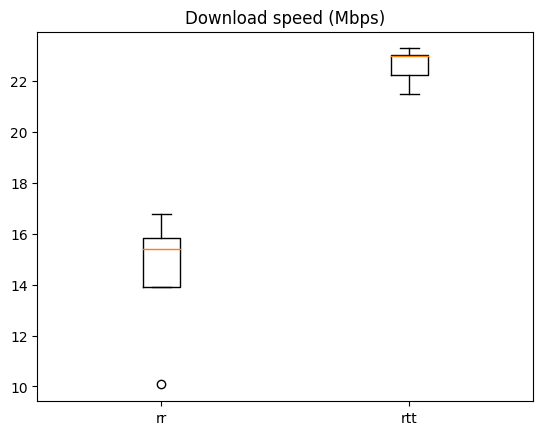

In [590]:

plt.boxplot([download_rr["mbps"], download_rtt["mbps"]], labels=["rr", "rtt"])
plt.title("Download speed (Mbps)")

In [591]:
rr_stats = pd.read_csv("./logs_rr/rr0.csv")
#rr_stats["elapsed"] = pd.to_timedelta(rr_stats["elapsed"], unit="ms")
rr_stats.index = pd.to_timedelta(rr_stats["elapsed"], unit="ms")
rr_stats["sent_bits"] = rr_stats["sent_bytes"] * 8
rr_stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,sent_bits
elapsed,,,,,,,,,
0 days 00:00:01.039000,1039,10.0.3.10:4433,10.0.1.1:5555,1200,357,13500,1200,0,9600
0 days 00:00:01.051000,1051,10.0.3.10:4433,10.0.1.1:5555,1683,527,13500,483,11,13464
0 days 00:00:01.066000,1066,10.0.3.10:4433,10.0.1.1:5555,3033,737,13500,1278,11,24264
0 days 00:00:01.077000,1077,10.0.3.10:4433,10.0.1.1:5555,4383,784,13500,1350,11,35064
0 days 00:00:01.089000,1089,10.0.3.10:4433,10.0.1.1:5555,5733,831,13500,1350,11,45864


In [592]:
rtt_stats = pd.read_csv("./logs_rtt/minRtt1.csv")
#rtt_stats["elapsed"] = pd.to_timedelta(rr_stats["elapsed"], unit="ms")
rtt_stats.index= pd.to_timedelta(rtt_stats["elapsed"], unit="ms")
rtt_stats["sent_bits"] = rtt_stats["sent_bytes"] * 8
rtt_stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,sent_bits
elapsed,,,,,,,,,
0 days 00:00:01.025000,1025,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,13464
0 days 00:00:01.040000,1040,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,12,122040
0 days 00:00:01.052000,1052,10.0.3.10:4433,10.0.1.1:5555,27333,1848,18900,18900,12,218664
0 days 00:00:01.052000,1052,10.0.3.10:4433,10.0.1.1:5555,30033,1895,20250,20250,12,240264
0 days 00:00:01.052000,1052,10.0.3.10:4433,10.0.1.1:5555,32733,1942,21600,21600,12,261864


In [593]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

rr_stats["path"] = "lte"
rr_stats.loc[rr_stats['remote']==remote_addr_wifi, "path"] = "wifi"

rtt_stats["path"] = "lte"
rtt_stats.loc[rtt_stats['remote']==remote_addr_wifi, "path"] = "wifi"


In [594]:
rr_stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,sent_bits,path
elapsed,,,,,,,,,,
0 days 00:00:01.039000,1039,10.0.3.10:4433,10.0.1.1:5555,1200,357,13500,1200,0,9600,lte
0 days 00:00:01.051000,1051,10.0.3.10:4433,10.0.1.1:5555,1683,527,13500,483,11,13464,lte
0 days 00:00:01.066000,1066,10.0.3.10:4433,10.0.1.1:5555,3033,737,13500,1278,11,24264,lte
0 days 00:00:01.077000,1077,10.0.3.10:4433,10.0.1.1:5555,4383,784,13500,1350,11,35064,lte
0 days 00:00:01.089000,1089,10.0.3.10:4433,10.0.1.1:5555,5733,831,13500,1350,11,45864,lte


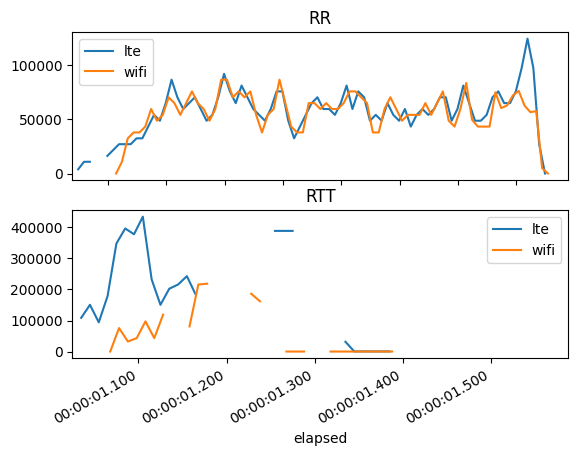

In [595]:
figure,axis =plt.subplots(2,1)

rr_stats[rr_stats["path"] == "lte"]["sent_bits"].resample("10ms").mean().diff().plot(label="lte",ax=axis[0])
rr_stats[rr_stats["path"] == "wifi"]["sent_bits"].resample("10ms").mean().diff().plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("RR")
rtt_stats[rtt_stats["path"] == "lte"]["sent_bits"].resample("10ms").mean().diff().plot(label="lte",ax=axis[1])
rtt_stats[rtt_stats["path"] == "wifi"]["sent_bits"].resample("10ms").mean().diff().plot(label="wifi",ax=axis[1])
axis[1].legend()
axis[1].set_title("RTT")

#axis[0].xaxis.set_major_formatter(mdates.DateConverter())
#axis[1].xaxis.set_major_formatter(mdates.DateFormatter("%s"))
plt.gcf().autofmt_xdate()





## Round Robin scheduler 

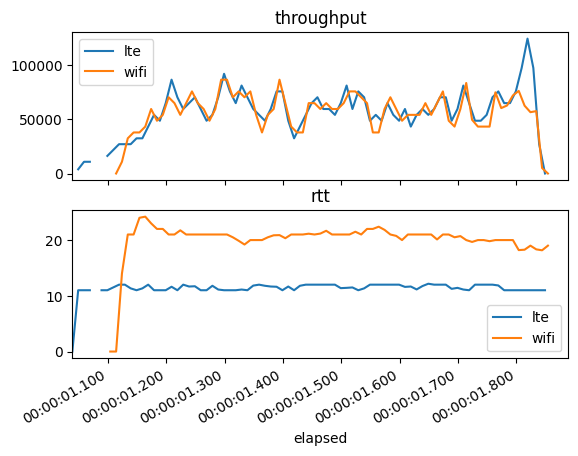

In [596]:
figure,axis =plt.subplots(2,1)



rr_stats[rr_stats["path"] == "lte"]["sent_bits"].resample("10ms").mean().diff().plot(label="lte",ax=axis[0])
rr_stats[rr_stats["path"] == "wifi"]["sent_bits"].resample("10ms").mean().diff().plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("throughput")

rr_stats[rr_stats["path"] == "lte"]["rtt"].resample("10ms").mean().plot(label="lte",ax=axis[1])
rr_stats[rr_stats["path"] == "wifi"]["rtt"].resample("10ms").mean().plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()
plt.gcf().autofmt_xdate()

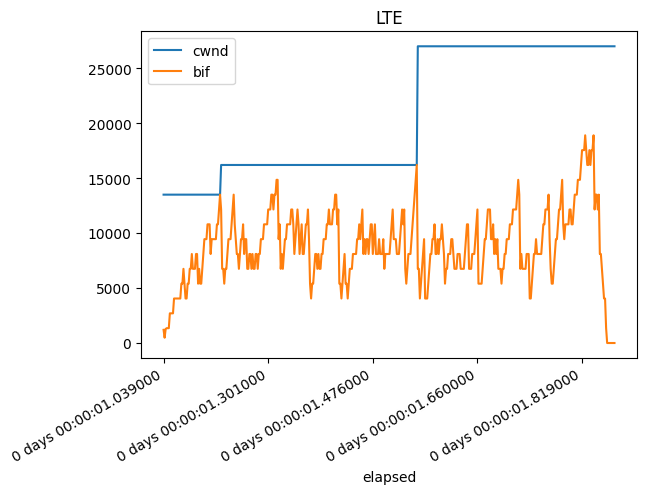

In [597]:
rr_stats[rr_stats["path"] == "lte"].plot(y=["cwnd","bif"])
plt.title("LTE")
plt.legend()
plt.gcf().autofmt_xdate()

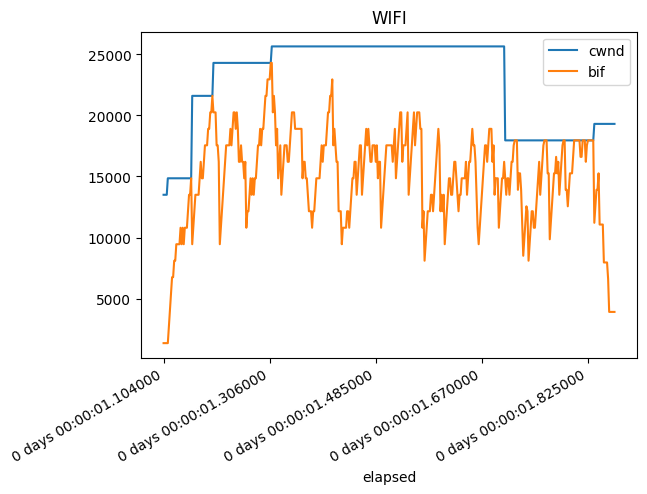

In [598]:
rr_stats[rr_stats["path"] == "wifi"].plot(y=["cwnd","bif"])
plt.title("WIFI")
plt.legend()



## RTT scheduler 

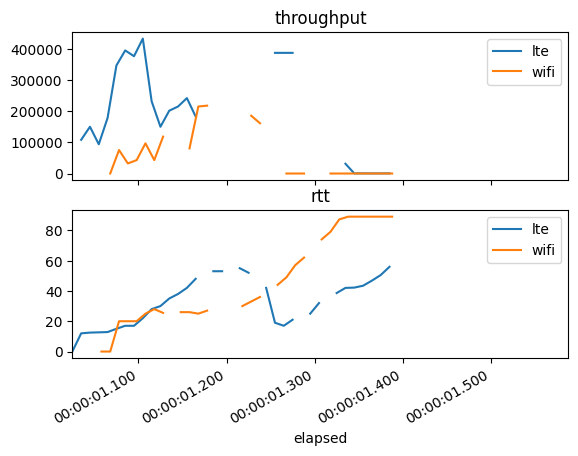

In [599]:
figure,axis =plt.subplots(2,1)



rtt_stats[rtt_stats["path"] == "lte"]["sent_bits"].resample("10ms").mean().diff().plot(label="lte",ax=axis[0])
rtt_stats[rtt_stats["path"] == "wifi"]["sent_bits"].resample("10ms").mean().diff().plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("throughput")

rtt_stats[rtt_stats["path"] == "lte"]["rtt"].resample("10ms").mean().plot(label="lte",ax=axis[1])
rtt_stats[rtt_stats["path"] == "wifi"]["rtt"].resample("10ms").mean().plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()
plt.gcf().autofmt_xdate()


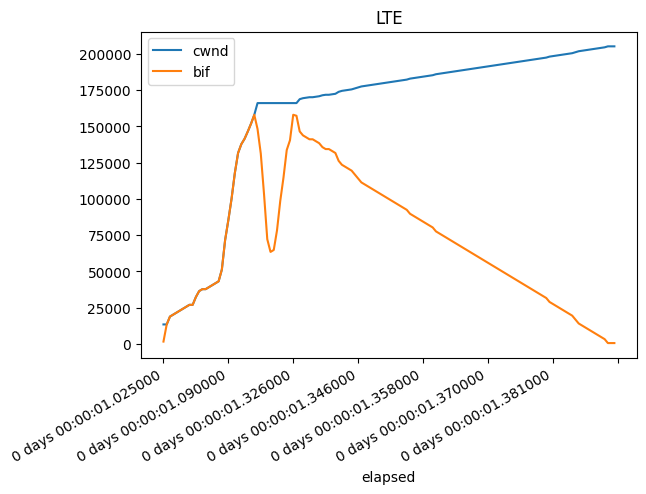

In [600]:
rtt_stats[rtt_stats["path"] == "lte"].plot(y=["cwnd","bif"])
plt.title("LTE")
plt.legend()


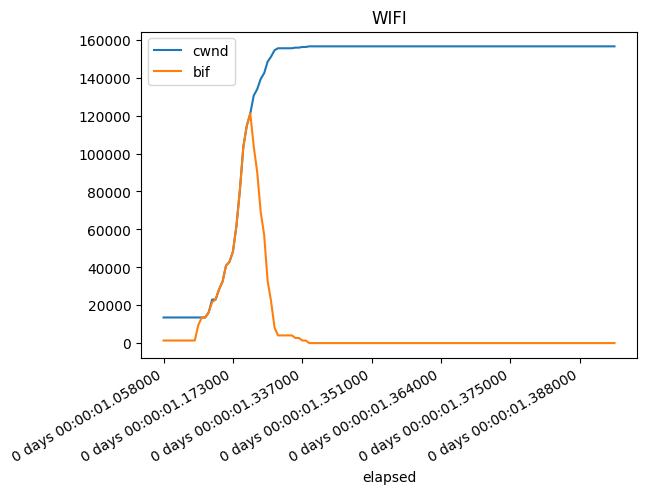

In [601]:
rtt_stats[rtt_stats["path"] == "wifi"].plot(y=["cwnd","bif"])
plt.title("WIFI")
plt.legend()


## Connection

In [602]:
rtt_conn = pd.read_csv("./logs_rtt/conn-0.csv")

In [603]:
rtt_conn.index = pd.to_timedelta(rtt_conn["elapsed"], unit="ms")

<AxesSubplot: xlabel='elapsed'>

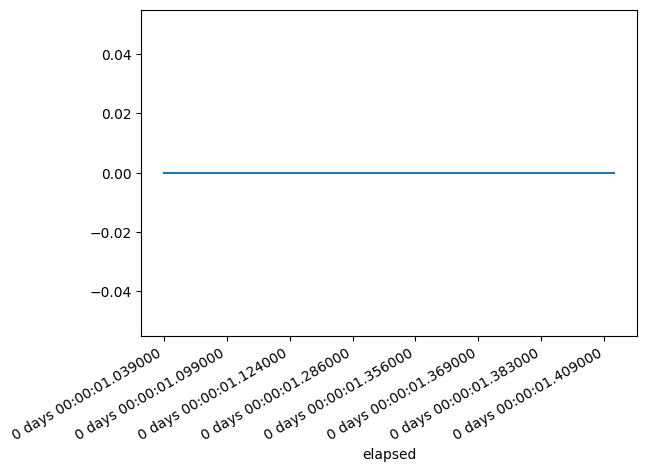

In [604]:
rtt_conn["lost_bytes_total"].plot()


<AxesSubplot: xlabel='elapsed'>

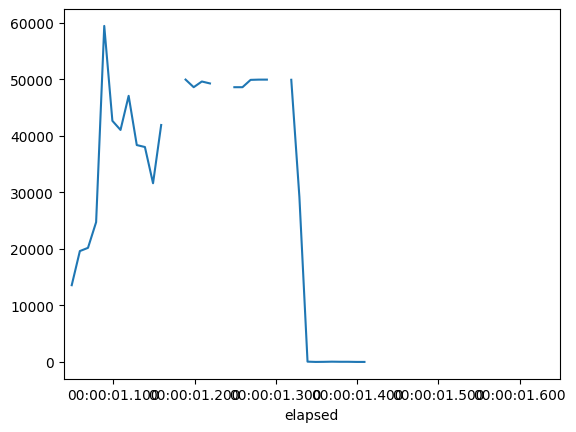

In [605]:
rtt_conn["sent_bytes_total"].resample("10ms").mean().diff().plot()

<AxesSubplot: xlabel='elapsed'>

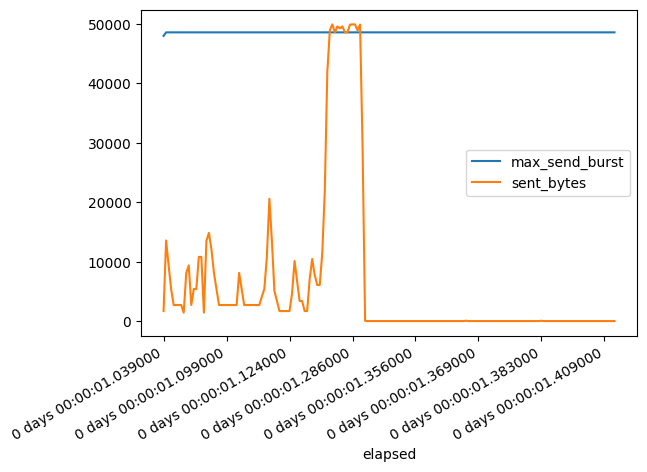

In [606]:
rtt_conn[["max_send_burst","sent_bytes"]].plot()